# K-Means

K-Means 클러스터링은 초기 값으로 주어진 Centroid의 위치 및 갯수를 통해 가까운 거리의 점들을 클러스터 하고 Centroid 를 다시 계산하는 방식을 거져 Centroid 의 위치가 최적화 될때까지 클러스링을 진행합니다.  

![kmeans](https://dashee87.github.io/images/kmeans.gif)

K-Means 클러스터링 방식은 클러스터의 군집, 밀도가 고르고 Circle 형태의 클러스터에서는 잘 작동하는 반면, 아래와 같은 Moon 형식의 데이터에서는 만족할 만한 성과를 내지 못합니다.

data shape: np_data_xs=(1000, 2), np_data_ys=(1000,)
data shape: np_data_xs=(1000, 2), np_data_ys=(1000,)


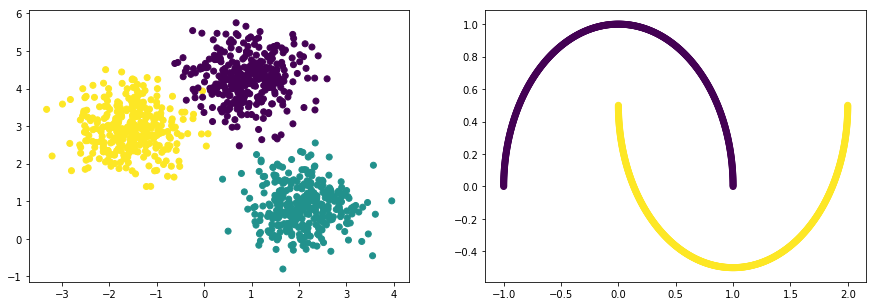


model=KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)
score=0.57071

model=KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)
score=0.49305


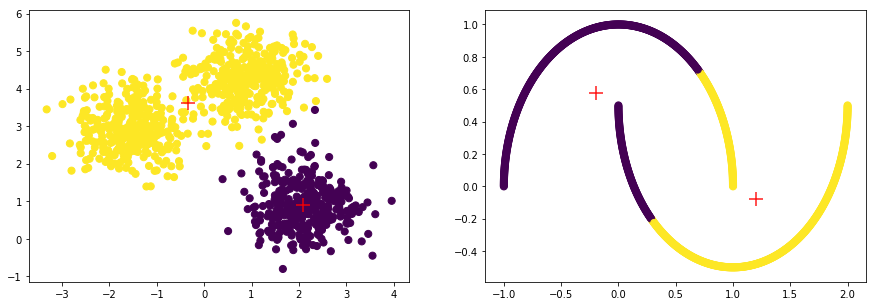


model=KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)
score=0.65326

model=KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)
score=0.43287



model=MiniBatchKMeans(batch_size=6, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=2,
        n_init=3, random_state=None, reassignment_ratio=0.01, tol=0.0,
        verbose=0)
score=0.56947

model=MiniBatchKMeans(batch_size=6, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=2,
        n_init=3, random_state=None, reassignment_ratio=0.01, tol=0.0,
        verbose=0)
score=0.49231


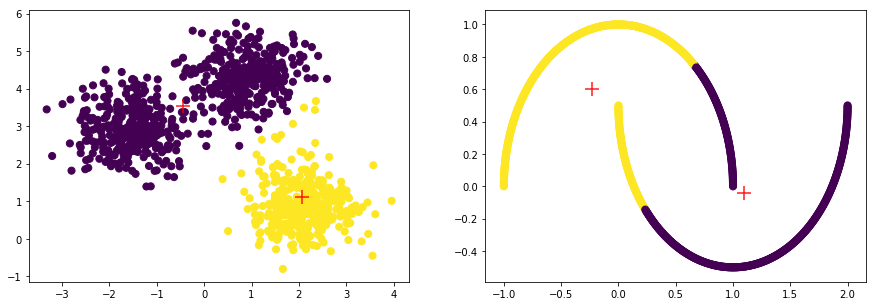


model=MiniBatchKMeans(batch_size=6, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=3,
        n_init=3, random_state=None, reassignment_ratio=0.01, tol=0.0,
        verbose=0)
score=0.65324

model=MiniBatchKMeans(batch_size=6, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=3,
        n_init=3, random_state=None, reassignment_ratio=0.01, tol=0.0,
        verbose=0)
score=0.43628


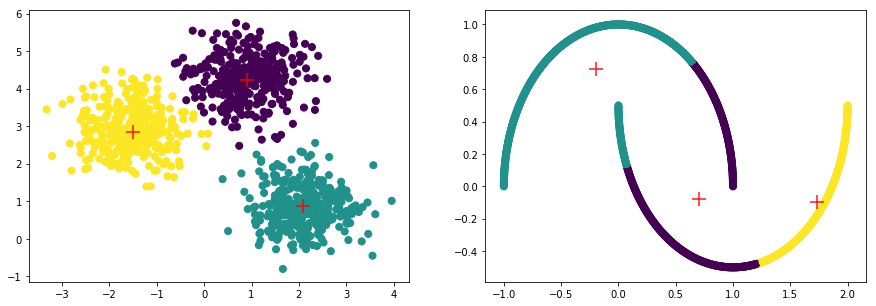

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

import numpy as np
from sklearn import datasets, model_selection, cluster, metrics

# 데이터
np.random.seed(0)
n_samples = 1000
plt.rcParams['figure.figsize'] = (15,5)

np_datasets = []
np_data_xs, np_data_ys = datasets.samples_generator.make_blobs(
    n_samples=n_samples,
    centers=3,
    cluster_std=0.60,
    random_state=0)
print("data shape: np_data_xs={}, np_data_ys={}".format(np_data_xs.shape, np_data_ys.shape))
np_datasets.append((np_data_xs, np_data_ys))
plt.subplot(1, 2, 1)
plt.scatter(np_data_xs[:, 0], np_data_xs[:, 1], c=np_data_ys)

np_data_xs, np_data_ys = datasets.make_moons(
    n_samples=n_samples,
    random_state=0)
print("data shape: np_data_xs={}, np_data_ys={}".format(np_data_xs.shape, np_data_ys.shape))
np_datasets.append((np_data_xs, np_data_ys))
plt.subplot(1, 2, 2)
plt.scatter(np_data_xs[:, 0], np_data_xs[:, 1], c=np_data_ys)

plt.show()

# 모델
# MiniBatchKMeans: KMeans 보다 수행시간을 최적화한 버전
# init='k-means++': centroid 를 서로 떨어진 상태로 초기화하여 결과 향상에 도움을 줍니다.
models = [
    cluster.KMeans(init='k-means++', n_clusters=2),
    cluster.KMeans(init='k-means++', n_clusters=3),    
    cluster.MiniBatchKMeans(init='k-means++', batch_size=6, n_clusters=2),
    cluster.MiniBatchKMeans(init='k-means++', batch_size=6, n_clusters=3),
]

for model in models:
    for i, np_dataset in enumerate(np_datasets):
        np_data_xs, np_data_ys = np_dataset[0], np_dataset[1]

        # 학습
        print("\nmodel={}".format(model))
        model.fit(np_data_xs)

        # 평가
        labels = model.labels_
        centers = model.cluster_centers_
        plt.subplot(1, 2, i+1)
        plt.scatter(np_data_xs[:, 0], np_data_xs[:, 1], c=labels, s=50, cmap='viridis')    
        plt.scatter(centers[:, 0], centers[:, 1], c='r', marker = '+', s=200, alpha=0.9);    

        score = metrics.silhouette_score(np_data_xs, labels, metric='euclidean')
        print("score={:.5f}".format(score))
    plt.show()